In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# Insights About Dataset & Visualize

In [178]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [179]:
df.shape

(5110, 12)

In [180]:
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [181]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [182]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill missing values

In [183]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

df = df.drop('id', axis=1)


# Visualize distribution of dataset

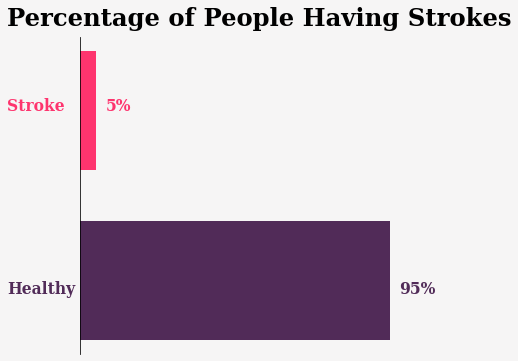

In [12]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150,-0.08, 'Healthy',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#512b58'})
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#512b58'})
ax.barh([0], x.stroke[0], height = 0.7, color = '#512b58')
plt.text(-1150,1, 'Stroke', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#fe346e'})
plt.text(400,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#fe346e'})

plt.text(-1150, 1.5, 'Percentage of People Having Strokes', {'font': 'Serif','weight':'bold','Size': '25', 'color':'black'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Univariate analysis of continous variables

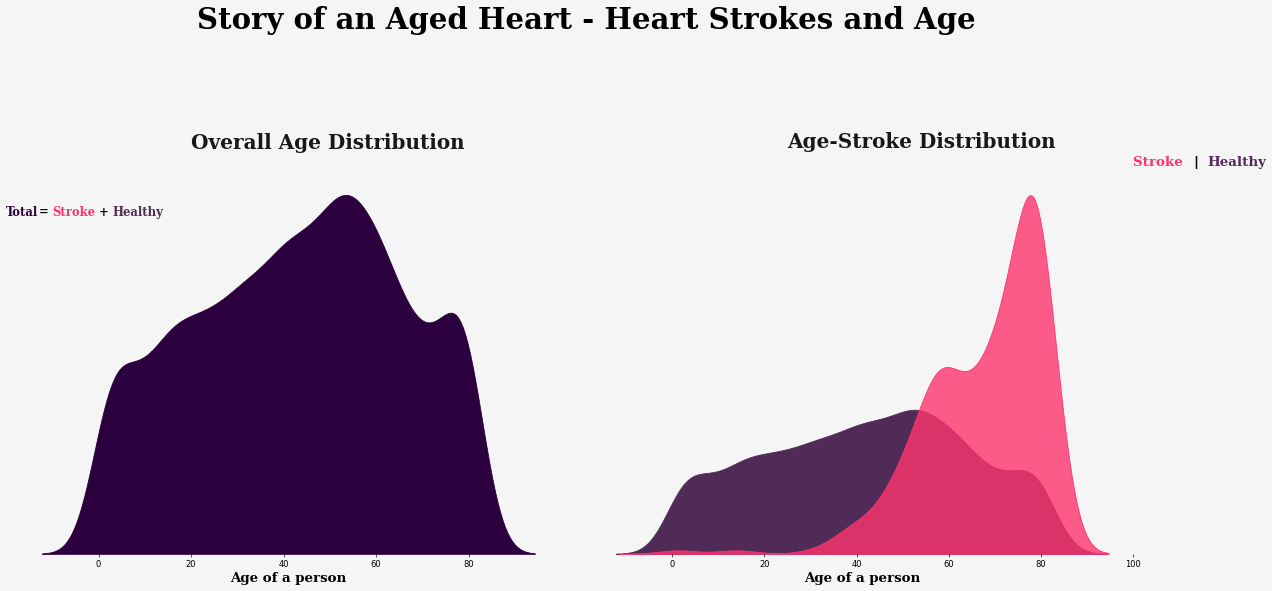

In [41]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[1:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.018,'Overall Age Distribution ', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

ax1.text(-20,0.015, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(-13,0.015, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(-10,0.015, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(0,0.015, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(3,0.015, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(25,0.045,'Age-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(113,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(116,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

## Glucose

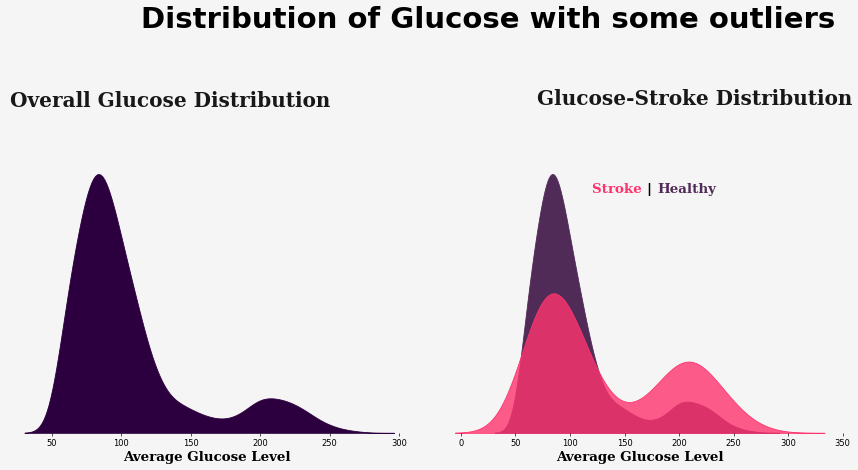

In [42]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Average Glucose Level ', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.02,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(70,0.0205,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(120,0.015, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(170,0.015, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(180,0.015, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1.25,'Distribution of Glucose with some outliers', {'weight':'bold','color': 'black', 'size':35})
fig.show()

In [43]:
df_glucose=sorted(df['avg_glucose_level'])
Q1,Q3=np.percentile(df_glucose,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print(lower_range,upper_range)
df_lower_outliers=df[df.avg_glucose_level<lower_range]
df_upper_outliers=df[df.avg_glucose_level>upper_range]

21.97749999999997 169.35750000000002


<AxesSubplot:xlabel='avg_glucose_level'>

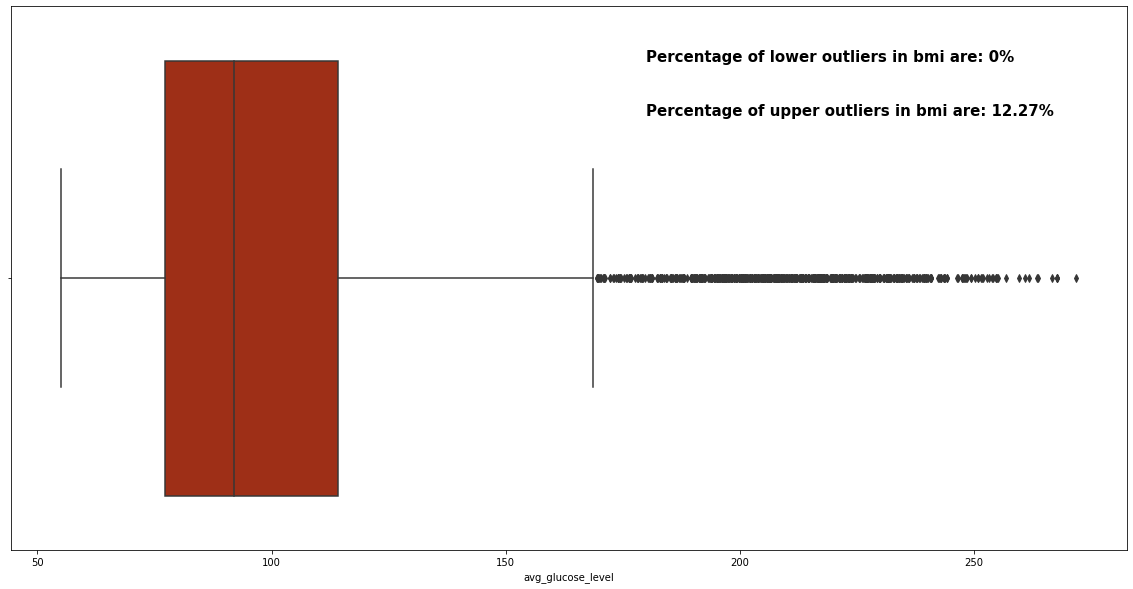

In [44]:
plt.figure(figsize=(20,10))
plt.text(180,-0.3,'Percentage of upper outliers in bmi are: 12.27%',fontweight='bold',fontsize=15)
plt.text(180,-0.4,'Percentage of lower outliers in bmi are: 0%',fontweight='bold',fontsize=15)
sns.boxplot(data=df,x='avg_glucose_level',palette='gnuplot')

In [28]:
df1_outliers_glucose=df.drop(df[df.avg_glucose_level>upper_range].index)

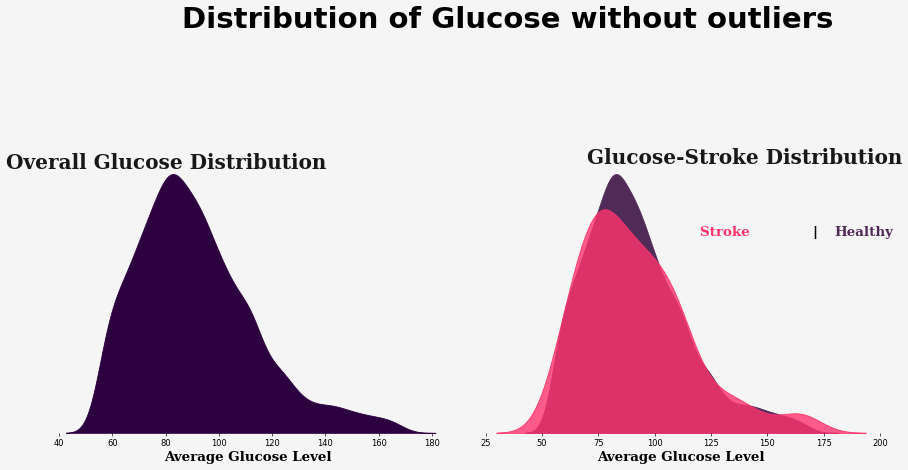

In [45]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df1_outliers_glucose, x = 'avg_glucose_level', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Average Glucose Level ', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.02,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df1_outliers_glucose[df1_outliers_glucose['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df1_outliers_glucose[df1_outliers_glucose['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(70,0.0205,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(120,0.015, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(170,0.015, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(180,0.015, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1.25,'Distribution of Glucose without outliers', {'weight':'bold','color': 'black', 'size':35})
fig.show()

### BMI Index

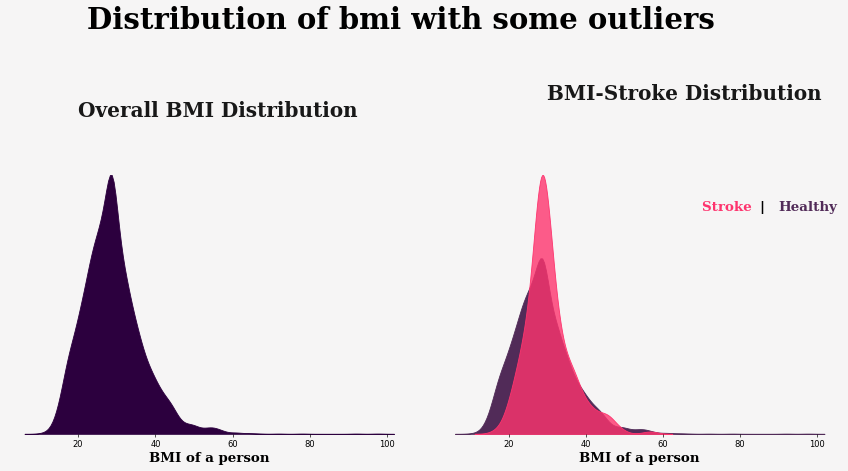

In [185]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.08,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(30,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(70,0.08, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(85,0.08, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(90,0.08, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.2,1.25,'Distribution of bmi with some outliers',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

In [186]:
df_bmi=sorted(df['bmi'])
Q1,Q3=np.percentile(df_bmi,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print(lower_range,upper_range)
df_lower_outliers=df[df.bmi<lower_range]
df_upper_outliers=df[df.bmi>upper_range]

10.300000000000006 46.29999999999999


<AxesSubplot:title={'center':'Box Plot of body mass index'}, xlabel='bmi'>

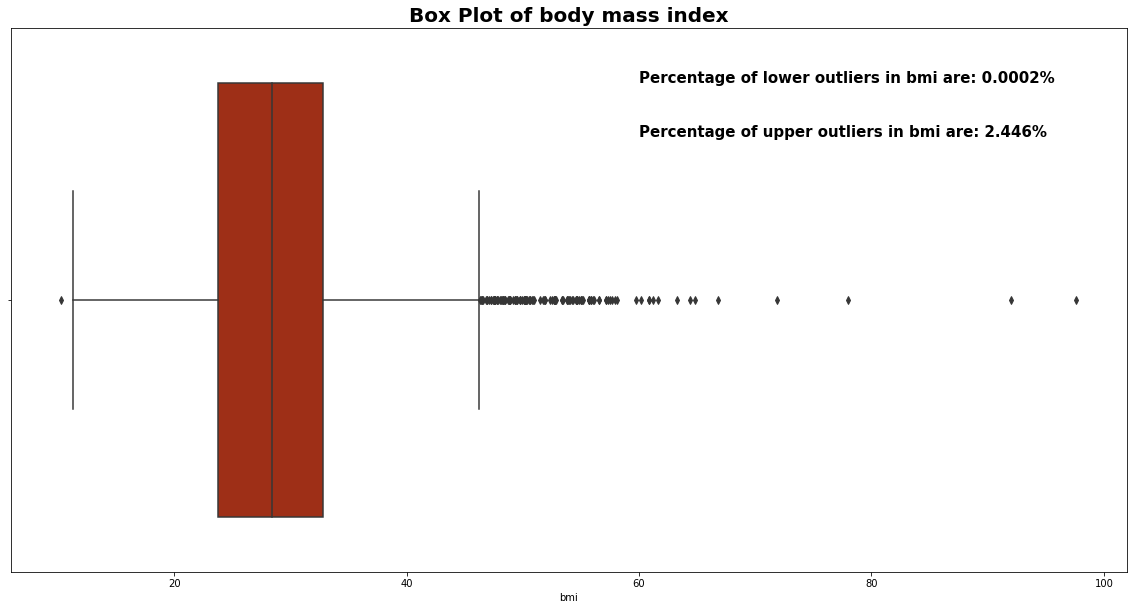

In [187]:
plt.figure(figsize=(20,10))
plt.text(60,-0.3,'Percentage of upper outliers in bmi are: 2.446%',fontweight='bold',fontsize=15)
plt.text(60,-0.4,'Percentage of lower outliers in bmi are: 0.0002%',fontweight='bold',fontsize=15)
plt.title("Box Plot of body mass index",fontweight='bold',fontsize=20)
sns.boxplot(data=df,x='bmi',palette='gnuplot')

In [188]:
df1_without_outliers=df.drop(df[df.bmi>upper_range].index)

In [189]:
df1_without_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


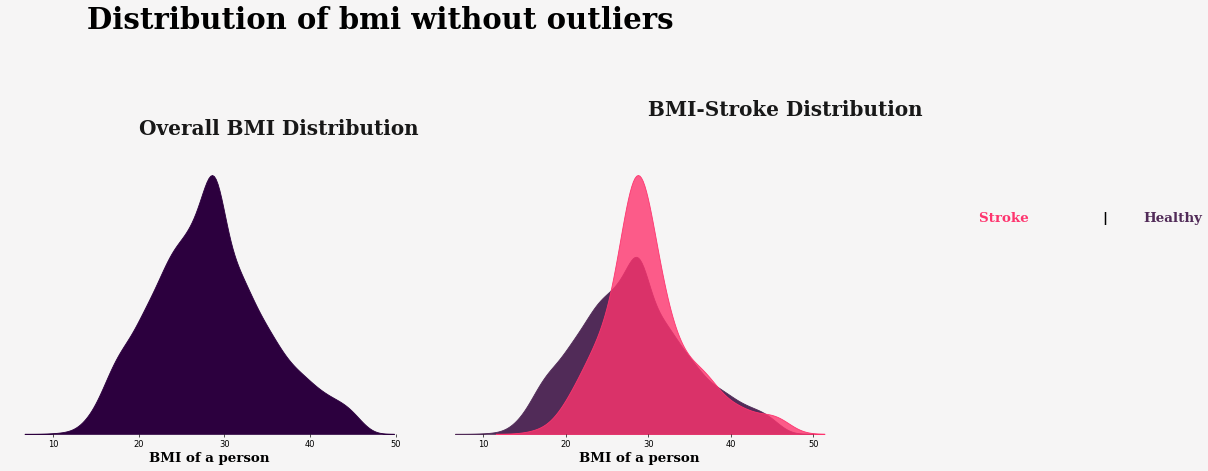

In [51]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df1_without_outliers, x = 'bmi', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.08,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df1_without_outliers[df1_without_outliers['stroke'] == 0], x = 'bmi',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df1_without_outliers[df1_without_outliers['stroke'] == 1], x = 'bmi',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(30,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(70,0.08, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(85,0.08, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(90,0.08, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.2,1.25,'Distribution of bmi without outliers',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

In [52]:
df.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Univariate analysis of discrete variables

In [53]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


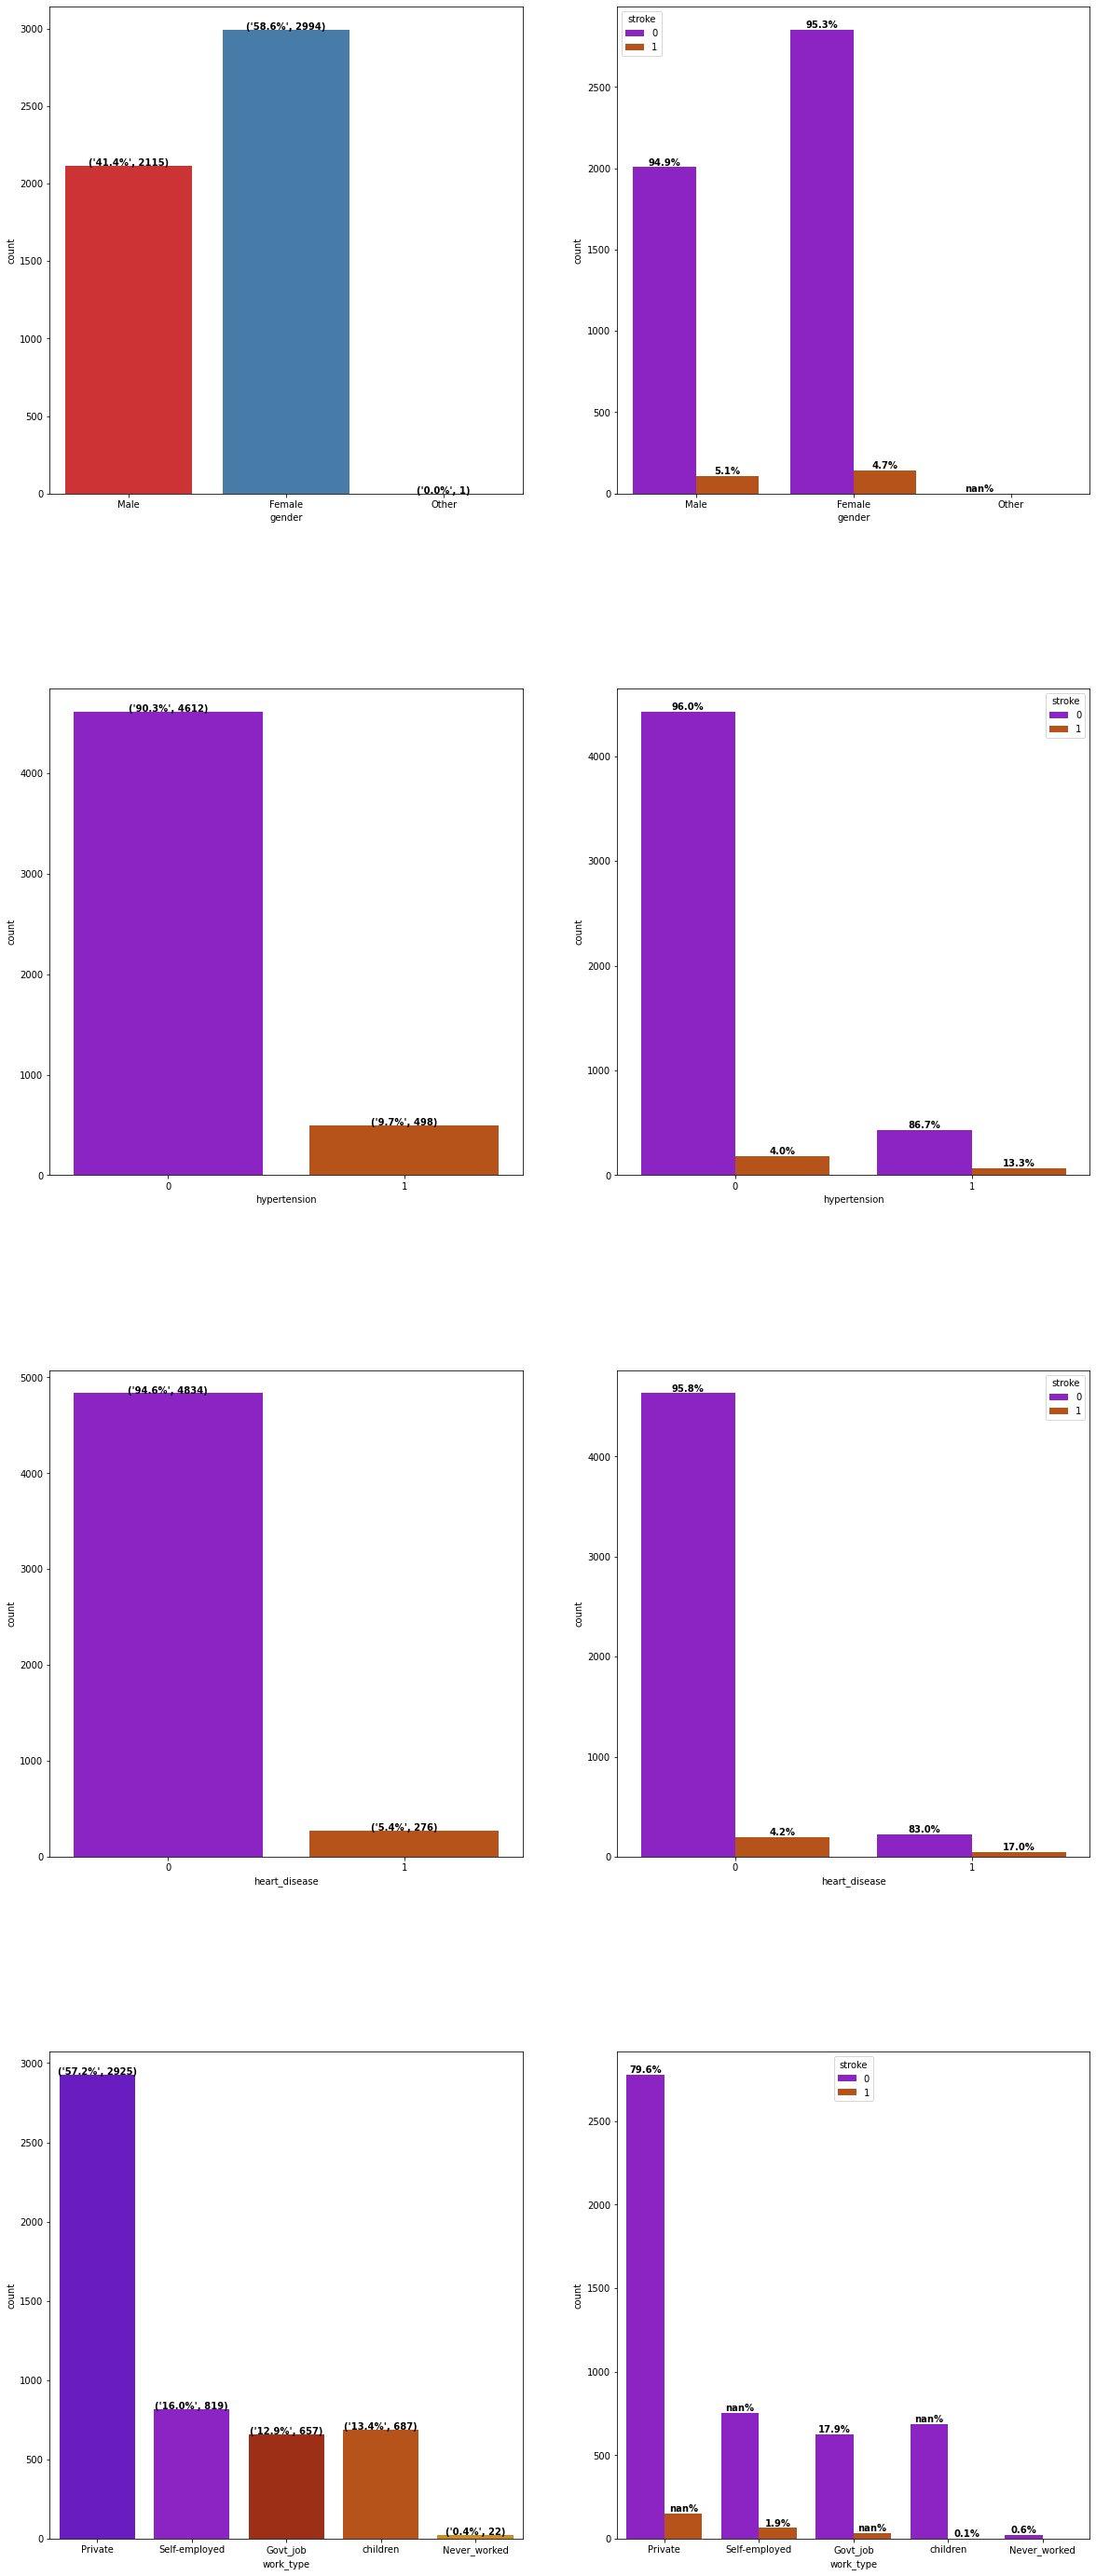

In [54]:
f,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,50), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10,10],'wspace': 0.2,
                       'hspace': 0.4})


a1=sns.countplot(data=df,x="gender",ax=ax[0][0],palette="Set1")
without_hue(df,'gender',a1)
a2=sns.countplot(data=df,x='gender',hue='stroke',palette="gnuplot",ax=ax[0][1])
with_hue(df,'gender',a2)

b1=sns.countplot(data=df,x="hypertension",palette="gnuplot",ax=ax[1][0])
without_hue(df,'hypertension',b1)
b2=sns.countplot(data=df,x='hypertension',hue='stroke',palette="gnuplot",ax=ax[1][1])
with_hue(df,'hypertension',b2)

c1=sns.countplot(data=df,x="heart_disease",palette="gnuplot",ax=ax[2][0])
without_hue(df,'heart_disease',c1)
c2=sns.countplot(data=df,x='heart_disease',hue='stroke',palette="gnuplot",ax=ax[2][1])
with_hue(df,'heart_disease',c2)

d1=sns.countplot(data=df,x="work_type",palette="gnuplot",ax=ax[3][0])
without_hue(df,'heart_disease',d1)
d2=sns.countplot(data=df,x='work_type',hue='stroke',palette="gnuplot",ax=ax[3][1])
with_hue(df,'heart_disease',d2)

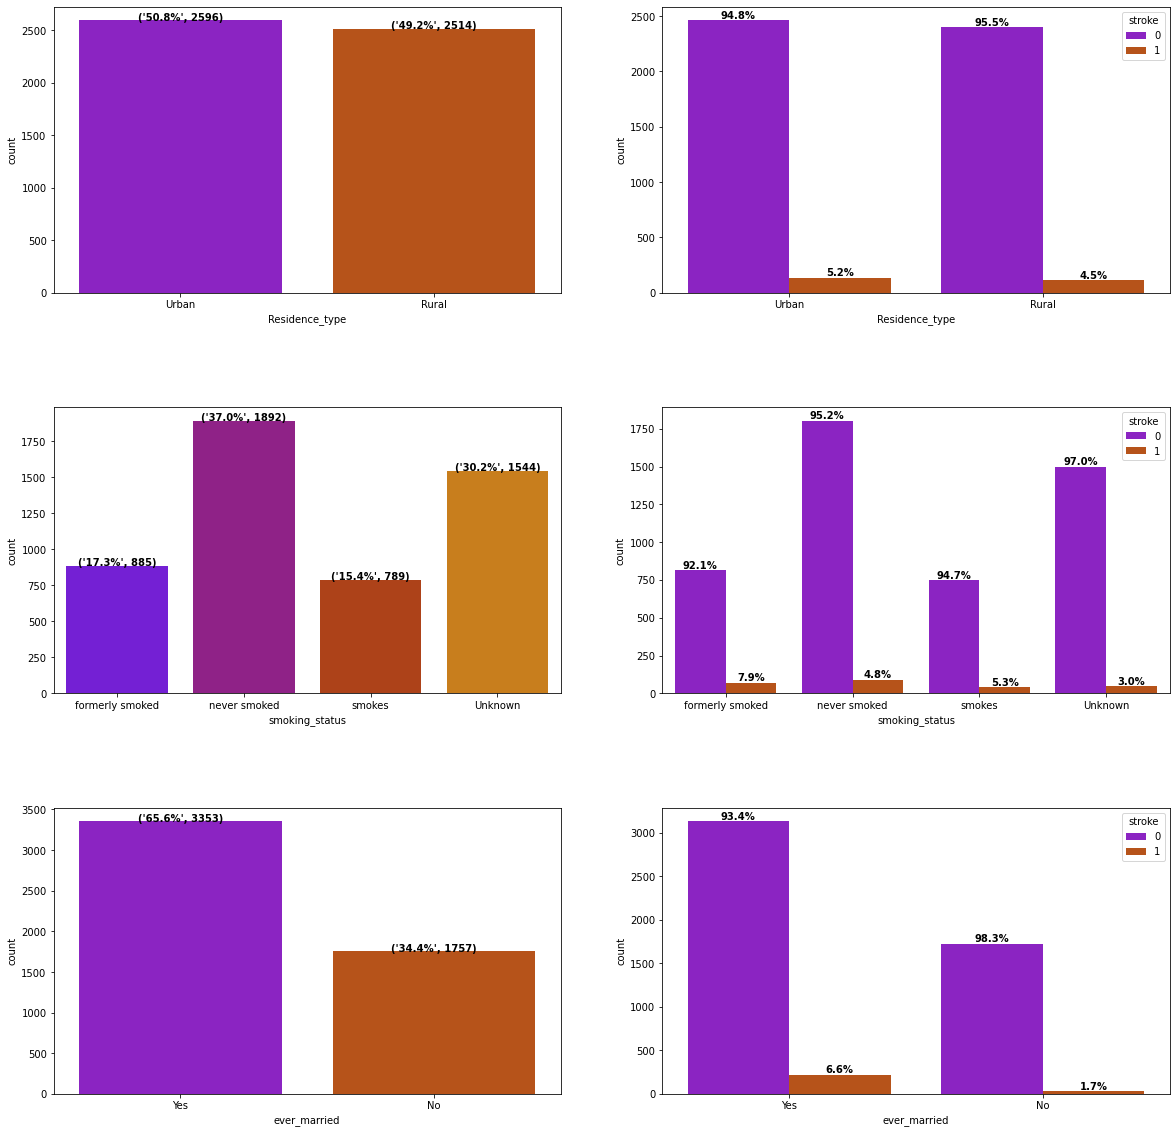

In [55]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10],'wspace': 0.2,
                       'hspace': 0.4})




e1=sns.countplot(data=df,x="Residence_type",palette="gnuplot",ax=ax[0][0])
without_hue(df,'Residence_type',e1)

e2=sns.countplot(data=df,x='Residence_type',hue='stroke',palette="gnuplot",ax=ax[0][1])
with_hue(df,'Residence_type',e2)

f1=sns.countplot(data=df,x="smoking_status",palette="gnuplot",ax=ax[1][0])
without_hue(df,"smoking_status",f1)

f2=sns.countplot(data=df,x='smoking_status',hue='stroke',palette="gnuplot",ax=ax[1][1])
with_hue(df,"smoking_status",f2)

g1=sns.countplot(data=df,x="ever_married",palette="gnuplot",ax=ax[2][0])
without_hue(df,"ever_married",g1)

g2=sns.countplot(data=df,x='ever_married',hue='stroke',palette="gnuplot",ax=ax[2][1])
with_hue(df,"ever_married",g2)

In [56]:
df1_without_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [57]:
df1_outliers_glucose

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,Overweight,Elderly,Low
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,Ideal,Elderly,Normal
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,Overweight,Mid Adults,Low
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,Ideal,Elderly,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,Elderly,Low
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,Elderly,Normal
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,Adults,Low
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,Mid Adults,High


# Model


In [118]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import optuna
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score,plot_roc_curve,f1_score
from sklearn.preprocessing import StandardScaler

In [190]:
df2=df1_without_outliers.copy()
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [191]:
df2['age'] = df2['age'].apply(lambda x: np.log(x+10)*3)
df2['avg_glucose_level'] = df2['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df2['bmi'] = df2['bmi'].apply(lambda x: np.log(x+10)*2)

In [192]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,13.031416,0,1,Yes,Private,Urban,10.950331,7.683201,formerly smoked,1
1,51676,Female,12.788040,0,0,Yes,Self-employed,Rural,10.715153,7.321641,never smoked,1
2,31112,Male,13.499429,0,1,Yes,Private,Rural,9.505801,7.499008,never smoked,1
3,60182,Female,12.232612,0,0,Yes,Private,Urban,10.399534,7.586479,smokes,1
4,1665,Female,13.465909,1,0,Yes,Self-employed,Rural,10.431175,7.052721,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,13.499429,1,0,Yes,Private,Urban,9.081263,7.321641,never smoked,0
5106,44873,Female,13.532579,0,0,Yes,Self-employed,Urban,9.813510,7.824046,never smoked,0
5107,19723,Female,11.419987,0,0,Yes,Self-employed,Rural,9.064984,7.407536,never smoked,0
5108,37544,Male,12.332622,0,0,Yes,Private,Rural,10.344261,7.144691,formerly smoked,0


In [193]:
df2['work_type'].value_counts()

Private          2836
Self-employed     801
children          687
Govt_job          639
Never_worked       22
Name: work_type, dtype: int64

In [194]:
df2['smoking_status'].value_counts()

never smoked       1836
Unknown            1516
formerly smoked     862
smokes              771
Name: smoking_status, dtype: int64

## Label Encoding

In [195]:
df2['gender']=df2["gender"].map({"Male":0,"Female":1,"Other":2}).astype(int)
df2['ever_married']=df2["ever_married"].map({"Yes":1,"No":0}).astype(int)
df2['Residence_type']=df2["Residence_type"].map({"Urban":1,"Rural":0}).astype(int)
df2['work_type']=df2['work_type'].map({"Private":0,'Self-employed':1,'children':2,'Govt_job':3,
                                      "Never_worked":4})
df2['smoking_status']=df2['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,
                                                "smokes":3})

df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,13.031416,0,1,1,0,1,10.950331,7.683201,2,1
1,51676,1,12.788040,0,0,1,1,0,10.715153,7.321641,0,1
2,31112,0,13.499429,0,1,1,0,0,9.505801,7.499008,0,1
3,60182,1,12.232612,0,0,1,0,1,10.399534,7.586479,3,1
4,1665,1,13.465909,1,0,1,1,0,10.431175,7.052721,0,1


In [196]:
Y_new=df2['stroke']
X_new=df2.drop('stroke',axis=1)

In [197]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(X_new,Y_new,test_size=0.2,random_state=42)

In [198]:
y_train_new.value_counts()

0    3802
1     186
Name: stroke, dtype: int64

In [199]:
y_test_new.value_counts()

0    937
1     60
Name: stroke, dtype: int64

In [200]:
smt=SMOTE()
x_train_sampling_new,y_train_sampling_new=smt.fit_resample(x_train_new,y_train_new)

In [201]:
y_train_sampling_new.value_counts()

1    3802
0    3802
Name: stroke, dtype: int64

## Random Forest Classifier

In [122]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()


In [123]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-05-15 16:57:31,922] A new study created in memory with name: no-name-05ba1ef2-6f65-46c8-878d-8447b0812a0a
[I 2021-05-15 16:57:32,000] Trial 0 finished with value: 0.7825883063093452 and parameters: {'n_estimators': 3, 'max_depth': 3.495724275219585}. Best is trial 0 with value: 0.7825883063093452.
[I 2021-05-15 16:57:32,146] Trial 1 finished with value: 0.8516385496103842 and parameters: {'n_estimators': 19, 'max_depth': 5.91141262324579}. Best is trial 1 with value: 0.8516385496103842.
[I 2021-05-15 16:57:32,236] Trial 2 finished with value: 0.8071823921934124 and parameters: {'n_estimators': 14, 'max_depth': 2.0474521213579644}. Best is trial 1 with value: 0.8516385496103842.
[I 2021-05-15 16:57:32,342] Trial 3 finished with value: 0.9278474572358959 and parameters: {'n_estimators': 8, 'max_depth': 21.183783586639617}. Best is trial 3 with value: 0.9278474572358959.
[I 2021-05-15 16:57:32,468] Trial 4 finished with value: 0.8606968195988115 and parameters: {'n_estimators': 17

[I 2021-05-15 16:57:37,080] Trial 39 finished with value: 0.9338984332915583 and parameters: {'n_estimators': 20, 'max_depth': 18.88692141095144}. Best is trial 36 with value: 0.9342202262956019.
[I 2021-05-15 16:57:37,270] Trial 40 finished with value: 0.9250421806384594 and parameters: {'n_estimators': 17, 'max_depth': 14.378473418495709}. Best is trial 36 with value: 0.9342202262956019.
[I 2021-05-15 16:57:37,482] Trial 41 finished with value: 0.9342918245387217 and parameters: {'n_estimators': 20, 'max_depth': 17.74949318410473}. Best is trial 41 with value: 0.9342918245387217.
[I 2021-05-15 16:57:37,675] Trial 42 finished with value: 0.9333412642040126 and parameters: {'n_estimators': 19, 'max_depth': 17.033813837124175}. Best is trial 41 with value: 0.9342918245387217.
[I 2021-05-15 16:57:37,880] Trial 43 finished with value: 0.9344469685631014 and parameters: {'n_estimators': 18, 'max_depth': 31.724547447453727}. Best is trial 43 with value: 0.9344469685631014.
[I 2021-05-15 16:

In [124]:
trial = study.best_trial
print(trial.value)
print(trial.params)

0.9347728029721726
{'n_estimators': 18, 'max_depth': 23.13393982183435}


In [125]:
clf=RandomForestClassifier(max_depth=23, n_estimators=18)
clf.fit(x_train_sampling_new,y_train_sampling_new)

RandomForestClassifier(max_depth=23, n_estimators=18)

In [126]:
pred_new=clf.predict(x_test_new)
print(accuracy_score(y_test_new,pred_new))

0.8665997993981945


In [127]:
print(classification_report(y_test_new,pred_new))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       937
           1       0.13      0.22      0.16        60

    accuracy                           0.87       997
   macro avg       0.54      0.56      0.55       997
weighted avg       0.90      0.87      0.88       997



<Figure size 720x720 with 0 Axes>

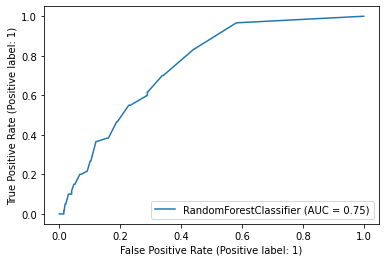

In [128]:
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_new,y_test_new)
plt.show()

## Decision Tree

In [138]:
def objective(trial):
    
    num_samples_split = trial.suggest_int('num_samples_split', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = DecisionTreeClassifier(min_samples_split=num_samples_split, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()

In [139]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-05-15 17:01:50,107] A new study created in memory with name: no-name-22987a00-2724-4f39-bd91-b090b62f0db5
[I 2021-05-15 17:01:50,167] Trial 0 finished with value: 0.8507978786038427 and parameters: {'num_samples_split': 8, 'max_depth': 6.418687722471289}. Best is trial 0 with value: 0.8507978786038427.
[I 2021-05-15 17:01:50,241] Trial 1 finished with value: 0.8813672089030613 and parameters: {'num_samples_split': 4, 'max_depth': 9.036426235620999}. Best is trial 1 with value: 0.8813672089030613.
[I 2021-05-15 17:01:50,299] Trial 2 finished with value: 0.8506046780441665 and parameters: {'num_samples_split': 8, 'max_depth': 6.7255727898254065}. Best is trial 1 with value: 0.8813672089030613.
[I 2021-05-15 17:01:50,360] Trial 3 finished with value: 0.8951850459756233 and parameters: {'num_samples_split': 3, 'max_depth': 13.275909629069155}. Best is trial 3 with value: 0.8951850459756233.
[I 2021-05-15 17:01:50,434] Trial 4 finished with value: 0.8935911179745245 and parameters: 

[I 2021-05-15 17:01:52,795] Trial 38 finished with value: 0.8954472041335769 and parameters: {'num_samples_split': 3, 'max_depth': 27.055652860124564}. Best is trial 12 with value: 0.9021966758107794.
[I 2021-05-15 17:01:52,879] Trial 39 finished with value: 0.8946797414743546 and parameters: {'num_samples_split': 5, 'max_depth': 20.584540354262213}. Best is trial 12 with value: 0.9021966758107794.
[I 2021-05-15 17:01:52,952] Trial 40 finished with value: 0.8934849601439341 and parameters: {'num_samples_split': 7, 'max_depth': 13.050971934576493}. Best is trial 12 with value: 0.9021966758107794.
[I 2021-05-15 17:01:53,019] Trial 41 finished with value: 0.9022859546759339 and parameters: {'num_samples_split': 2, 'max_depth': 16.318016565269833}. Best is trial 41 with value: 0.9022859546759339.
[I 2021-05-15 17:01:53,091] Trial 42 finished with value: 0.9005888926602145 and parameters: {'num_samples_split': 3, 'max_depth': 15.066002527474016}. Best is trial 41 with value: 0.9022859546759

In [140]:
trial = study.best_trial
print(trial.value)
print(trial.params)

0.9022859546759339
{'num_samples_split': 2, 'max_depth': 16.318016565269833}


In [141]:
clf=DecisionTreeClassifier(min_samples_split=2, max_depth=16)
clf.fit(x_train_sampling_new,y_train_sampling_new)

DecisionTreeClassifier(max_depth=16)

In [142]:
pred_new=clf.predict(x_test_new)
print(accuracy_score(y_test_new,pred_new))

0.8234704112337011


In [143]:
print(classification_report(y_test_new,pred_new))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       937
           1       0.12      0.30      0.17        60

    accuracy                           0.82       997
   macro avg       0.53      0.58      0.54       997
weighted avg       0.90      0.82      0.86       997



<Figure size 720x720 with 0 Axes>

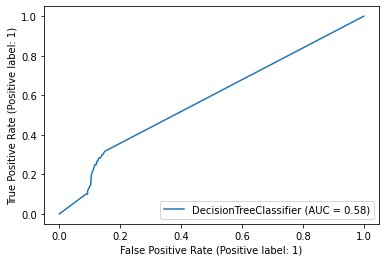

In [144]:
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_new,y_test_new)
plt.show()

In [209]:
from NNModel import Trainer


In [210]:
x_train_sampling_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,17762,1,7.694848,0,0,0,2,0,9.654707,6.741476,1
1,24096,1,11.352569,1,0,1,1,1,9.412021,7.321641,1
2,34045,1,8.671115,0,0,0,2,1,9.152512,6.523871,1
3,52847,1,12.523162,0,0,1,0,0,9.615569,7.237987,0
4,5496,1,12.022000,0,0,1,0,1,10.719389,7.321641,0
...,...,...,...,...,...,...,...,...,...,...,...
7599,66561,0,13.185743,0,0,0,0,1,9.643470,7.349584,0
7600,53731,0,13.258319,1,1,0,0,0,9.417957,7.299313,0
7601,65021,0,13.540993,0,0,1,0,0,10.804876,7.256356,1
7602,67898,1,13.312310,0,0,0,0,1,10.447845,7.376400,3


In [212]:
trainer = Trainer(x_train_sampling_new, y_train_sampling_new, x_test_new, y_test_new)

TypeError: __init__() got an unexpected keyword argument 'hidden_feature'